In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
all_df_gdp_growth = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_real_GDP_growth_rate")

In [16]:
gdp_growth_df = all_df_gdp_growth[0]

In [23]:
gdp_growth_df = gdp_growth_df.set_index('Country/region')

In [34]:
gdp_growth_df.head()

,Rank,Real GDP growthrate (%)[1],gini
Country/region,,,
South Sudan,1,11.3,46.3
Rwanda,2,10.1,43.7
Libya,3,9.9,NaN
Dominica,4,9.2,NaN
Ethiopia,5,9.0,35.0


In [38]:
gdp_growth_df = gdp_growth_df.dropna()

In [42]:
gdp_growth_df = gdp_growth_df.astype({'gini':'float64'})

In [45]:
gdp_growth_df['log growth'] = np.log(gdp_growth_df['Real GDP growthrate (%)[1]'])

/Users/jvalansi/.virtualenvs/notebooks3.7/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jvalansi/.virtualenvs/notebooks3.7/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [46]:
gdp_growth_df[gdp_growth_df['Real GDP growthrate (%)[1]']>-20]

,Rank,Real GDP growthrate (%)[1],gini,log growth
Country/region,,,,
South Sudan,1,11.3,46.3,2.424803
Rwanda,2,10.1,43.7,2.312535
Ethiopia,5,9.0,35.0,2.197225
Bangladesh,6,7.9,32.4,2.066863
Armenia,7,7.6,34.4,2.028148
...,...,...,...,...
Sudan,184,-2.5,35.4,NaN
Nicaragua,185,-3.9,46.2,NaN
Lebanon,188,-6.5,31.8,NaN


In [51]:
gdp_growth_df = gdp_growth_df[gdp_growth_df['Real GDP growthrate (%)[1]']>-20]

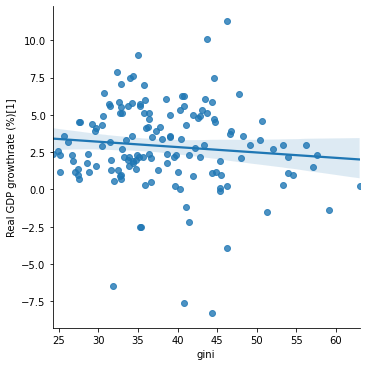

In [52]:
sns.lmplot(x='gini',y='Real GDP growthrate (%)[1]',data=gdp_growth_df,fit_reg=True)

In [62]:
reg = LinearRegression().fit(gdp_growth_df['gini'].values.reshape(-1,1), gdp_growth_df['Real GDP growthrate (%)[1]'].values)

In [64]:
reg.coef_

array([-0.03606904])

In [65]:
reg.intercept_

4.285425337585856

In [33]:
gdp_growth_df['gini'] = gini_df[3]

In [8]:
all_df_gini = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_income_equality")

In [15]:
gini_df = all_df_gini[1]

In [20]:
gini_df = gini_df.set_index(0)

In [24]:
gini_df['Real GDP growthrate'] = gdp_growth_df['Real GDP growthrate (%)[1]']

In [32]:
gini_df = gini_df[~gini_df.index.duplicated(keep='first')]

In [ ]:
gini_df